In [11]:
import numpy as np
import os
import cv2

import matplotlib.pyplot as plt
from sklearn import svm
import pickle

In [37]:
dir = 'Data/Training/'
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

data = []
data2 = []

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        cimg = cv2.imread(imgpath, 0)
        cimg = cv2.resize(cimg, (32, 32))
        image = np.array(cimg).flatten()
        
        data.append([image,label])
        
dir = 'Data/Testing/'
        
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        cimg = cv2.imread(imgpath, 0)
        cimg = cv2.resize(cimg, (32, 32))
        image = np.array(cimg).flatten()
        
        data2.append([image,label])
        
#pp = open('data.pickle', 'wb')
#pickle.dump(data, pp)
#pp.close()
#print(len(data))
#print((data2))

In [38]:
#pp = open('data.pickle', 'rb')
#data = pickle.load(pp)
#pp.close()

import random
random.shuffle(data)
random.shuffle(data2)

Xtrain = []
Ytrain = []
Xtest = []
Ytest = []


for feature, label in data:
    Xtrain.append(feature)
    Ytrain.append(label)

for feature, label in data2:
    Xtest.append(feature)
    Ytest.append(label)


In [44]:
model = svm.SVC(C = 1, kernel = 'poly', gamma = 'auto')
model.fit(Xtrain, Ytrain)

#pp = open('model.sav', 'wb')
#pickle.dump(model, pp)
#pp.close()

0.7614213197969543
Preiction is:  pituitary_tumor
Original is:  pituitary_tumor


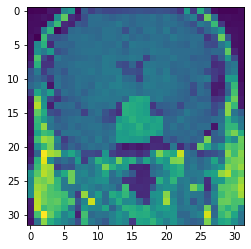

Preiction is:  pituitary_tumor
Original is:  pituitary_tumor


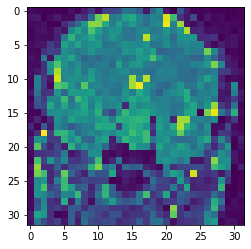

Preiction is:  meningioma_tumor
Original is:  meningioma_tumor


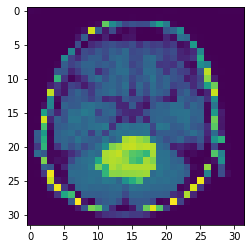

Preiction is:  no_tumor
Original is:  no_tumor


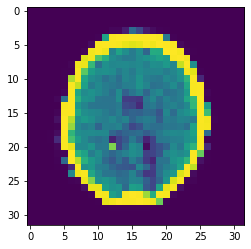

Preiction is:  no_tumor
Original is:  no_tumor


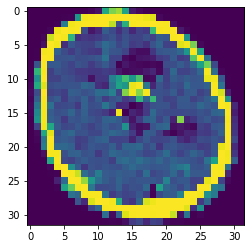

Preiction is:  meningioma_tumor
Original is:  meningioma_tumor


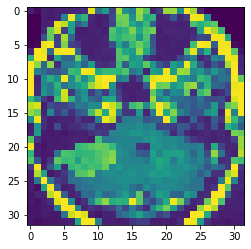

Preiction is:  no_tumor
Original is:  glioma_tumor


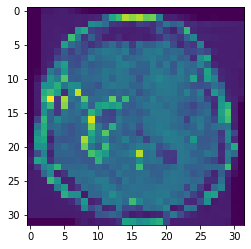

Preiction is:  no_tumor
Original is:  no_tumor


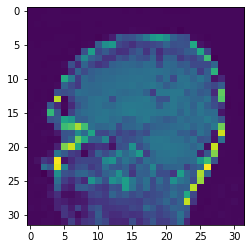

Preiction is:  glioma_tumor
Original is:  glioma_tumor


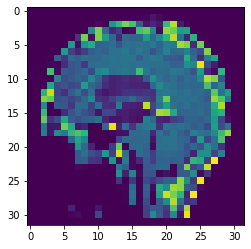

Preiction is:  no_tumor
Original is:  glioma_tumor


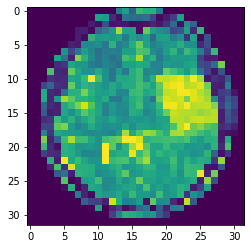

In [54]:
#pp = open('model.sav', 'rb')
#model = pickle.load(pp)
#pp.close()

prediction = model.predict(Xtest)
accuracy = model.score(Xtest, Ytest)
print(accuracy)
for i in range(10):
    print('Preiction is: ', categories[prediction[i]])
    print('Original is: ', categories[Ytest[i]])

    my = Xtest[i].reshape(32, 32)
    plt.imshow(my)
    plt.show()